In [1]:
%run partialOrder.ipynb

..........................................................................
----------------------------------------------------------------------
Ran 74 tests in 0.697s

OK
................................................................................
----------------------------------------------------------------------
Ran 80 tests in 0.687s

OK
..........................................................................................
----------------------------------------------------------------------
Ran 90 tests in 0.958s

OK


In [13]:
from graphviz import Digraph
from IPython.display import IFrame, display

class PartialOrderGraphRepr(PartialOrder):
    
    def makeGraph(self, name="graph",filename='cluster.gv'):
        g = Digraph(name=name, node_attr={'shape': 'circle'})
        g.body.append(f'\t label=""')
        g.body.append('\t rankdir=BT;')   
        g.body.append('\t edge [arrowhead="none"];')
        
        dom = self.get_domain() 
        
        dic = dict()
        for x in dom:
            dic[x] = {p for p in self.is_in_relation_with(x)}
            
        tmp = set()

        for x in dom:
            h = dic[x]
            for s in dic.keys():
                if x != s and s in dic[x]:
                    h = h - (dic[s] - {s})
                    
            tmp = tmp | {(str(x),str(p)) for p in h if x!= p}

            #for p in h:
            #    if x != p:
            #        g.edge(str(x),str(p))
            
        for x,p in tmp:
            g.edge(x,p)


        return g
    
    def makeGraph2(self, name="graph",filename='cluster.gv'):
        g = Digraph(name=name, node_attr={'shape': 'circle'})
        g.body.append(f'\t label=""')
        g.body.append('\t rankdir=BT;')   
        g.body.append('\t edge [arrowhead="none"];') 
        
        for x,y in self.get_relation():
            g.edge(str(x),str(y))

        return g
    
    

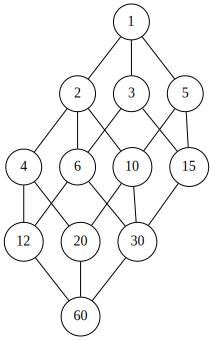

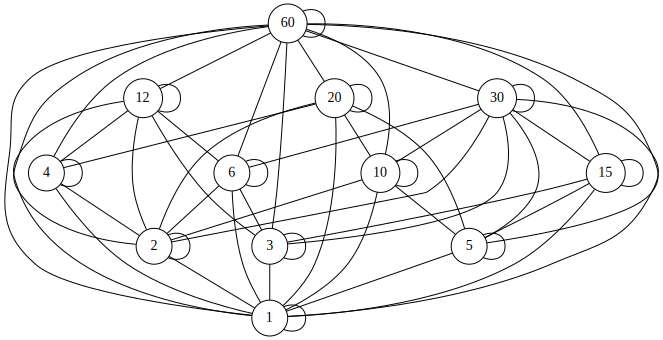

In [14]:
s = FiniteSet(1,2,3,4,5,6,10,12,15,20,30,60)
    
r = s ** 2

br = set()
for a,b in r:
    if b % a == 0:
        br.add((a,b))
        
p = PartialOrderGraphRepr(br, s)

display(p.makeGraph())
display(p.makeGraph2())

In [10]:
p.is_lattice()

True

In [14]:
p.supremum({4,10})

20

In [13]:
p.infimum({4,15})

1